# Node Embeddings

## Graph Representation Learning

Answer briefly:

1. How does graph representation learning alleviate the need to do feature engineering every single time?

1. Why do we map nodes to vectors instead of using the raw graph structure (e.g., the adjacency matrix)?

1. What happens after we get the node embeddings, how do we use them? (Hint: Think of a node classification task, where we want to assign labels to each node.)

## Inferring Graph Structure from Node Embeddings

Consider the following 2D embeddings of nodes A, B, C and D.

<center>

| Node | $z_1$ | $z_2$ |
|------|-------|-------|
| A    | 0.8   | 0.6   |
| B    | 0.7   | 0.5   |
| C    | -0.6  | 0.7   |
| D    | 0.9   | 0.5   |

</center>

1. Compute the pairwise similarities between nodes using dot product.

1. Based on the similarity values, which edges are most likely to exist in the original graph? Which pairs are unlikely to be connected?

1. Draw a possible graph consistent with these embeddings.

## Random Walk Similarity

To optimize node embeddings for random walk similarity, we minimize the following loss:

$$
\mathcal{L} = \sum_{u \in V} \sum_{v \in N_R(u)} -\log{\left(\frac{\exp{(z_u^T z_v)}}{\sum_{n \in V} \exp{(z_u^T z_n)}}\right)}
$$

1. Why minimizing this loss naively is too expensive, what's the culprit term?

1. How do we solve this issue?

1. Consider the following 2D node embeddings for nodes $u$, $v$, $n_1$ and $n_2$.

    <center>

    | Node  | $z_1$ | $z_2$ |
    | ----  | ----- | ----- |
    | $u$   | 0.0   | 0.0   |
    | $v$   | 0.0   | 1.0   |
    | $n_1$ | -1.0  | 0.0   |
    | $n_2$ | 1.0   | 0.0   |

    </center>

    Given the following, run one step of Stochastic Gradient Descent (SGD). What's the resulting embedding for the node $u$?

    - Node $u$ is the target node.
    - Node $v$ is a positive context of $u$ (appears in the same random walk).
    - Nodes $n_1$ and $n_2$ are other nodes in the graph.
    - Learning rate $\eta=0.1$
    <!-- - Assume the softmax probabilities (for simplicity) are: $P(v|u)=0.6$, $P(n_1|u)=0.25$, $P(n_2|u)=0.15$ -->

    Hint 1 (SGD update): $z_u \gets z_u - \eta \frac{\partial \ell(u,v)}{\partial z_u}$

    Hint 2 (Gradient): $\frac{\partial \ell(u,v)}{\partial z_u} = - z_v + \sum_{n \in V} P(n|u)\, z_n$

    Hint 3 (Softmax): $P(n|u) = \frac{\exp(z_u^\top z_n)}{\sum_{m \in V} \exp(z_u^\top z_m)}$

1. How did the embedding of node $u$ change after the SGD update? Explain how the direction of movement relates to node similarities.

1. What would happen if:
    - we remove the culprit term in $\mathcal{L}$ or have no negative samples at all?
    - we collect many extremely long random walks? 

## Programming: Random Walks on the Karate Club Network

In this exercise you'll implement and analyze biased random walks on a small network (Zachary's Karate Club) to explore how the walk parameters affect the paths and local/global structure captured by the walks.

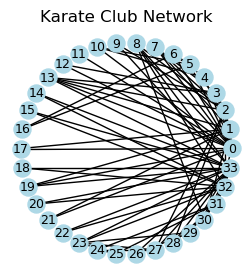

In [132]:
import networkx as nx
import matplotlib.pyplot as plt

# load the karate club graph
G = nx.karate_club_graph()

fig, ax = plt.subplots(figsize=(3,3))
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, node_color="lightblue", font_size=9, node_size=150, pos=pos, ax=ax)
ax.annotate("Karate Club Network", xy=(0.5, 1.05), xycoords="axes fraction", ha="center", fontsize=12)
ax.margins(0)
plt.show()

1. Complete the following `biased_random_walk` function, which performs a single biased random walk with a given length, start node, $p$ and $q$ parameters.

    Hints for implementation:

    - Start at `start_node`.
    - At each step, consider neighbors of the current node.
    - Assign probabilities to neighbors according to:
        - Return: neighbor = previous node → weight $\propto$ $1/p$
        - In-out: neighbor connected to previous node → weight $\propto$ $1$
        - Neighbor further away from previous node → weight $\propto$ $1/q$
    - Normalize probabilities and randomly choose the next node.

    This is essentially the biased random walk from `node2vec`. For more description, you can refer to the paper [here](https://arxiv.org/pdf/1607.00653).

In [116]:
def biased_random_walk(G, start_node, walk_length, p=1, q=1):
    """
    Perform a single biased random walk of length 'walk_length' starting at 'start_node'.

    Parameters:
    - G: NetworkX graph
    - start_node: node to start the walk from
    - walk_length: length of the walk
    - p: return parameter (likelihood of immediately revisiting a node in the walk)
    - q: in-out parameter (bias towards DFS vs BFS)

    Returns:
    - walk: list of node IDs in the walk
    """

    walk = [start_node]

    ############# Your code here ############
    
    #########################################

    return walk

2. Using your `biased_random_walk` function, generate 10 walks starting from node 20 for each of the following cases:
    - Unbiased: $p=1$ and $q=1$
    - BFS: $p=1$ and $q=2$
    - DFS: $p=1$ and $q=0.5$

    Then, compute the average distance from starting node for each case using the given `average_distance_from_start` function. Do the average distances align with the unbiased/BFS/DFS descriptions?

In [119]:
import networkx as nx

def average_distance_from_start(G, walks):
    """
    Computes average shortest-path distance from the starting node
    for each walk, then averages over all walks.
    """
    distances = []
    for walk in walks:
        start = walk[0]
        for node in walk[1:]:
            dist = nx.shortest_path_length(G, source=start, target=node)
            distances.append(dist)
    if len(distances) == 0:
        return 0
    return sum(distances) / len(distances)

# load the karate club graph
G = nx.karate_club_graph()

avg_dist_unbiased = 0
avg_dist_bfs = 0
avg_dist_dfs = 0

############# Your code here ############

#########################################

print(f"Average distance from start (Unbiased): {avg_dist_unbiased}")
print(f"Average distance from start (BFS): {avg_dist_bfs}")
print(f"Average distance from start (DFS): {avg_dist_dfs}")

Average distance from start (Unbiased): 0
Average distance from start (BFS): 0
Average distance from start (DFS): 0


## Programming: Node Embeddings via node2vec 

In this exercise, you'll use the tools from `PyG` to obtain embeddings for nodes in the Karate Club Network with `node2vec` algorithm. Then, you'll visualize the embeddings in a 2D space.

1. First, complete the `train` function in the following code snippet. The part you need to implement computes the loss using `Node2Vec` class implemented in `PyG`.

In [ ]:
import torch
from torch_geometric.nn import Node2Vec
import networkx as nx

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)

# load the karate club graph
G = nx.karate_club_graph()

# convert networkx graph to edge index tensor
edges = list(G.edges())
edges = edges + [(v, u) for (u, v) in edges]  # make undirected
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

model = Node2Vec(
    edge_index=edge_index,
    embedding_dim=8,
    walks_per_node=10,
    walk_length=5,
    context_size=3,
    p=1.0,
    q=1.0,
    num_negative_samples=5,
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
loader = model.loader(batch_size=64, shuffle=True, num_workers=4)

def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()

        ############# Your code here ############

        loss = 0

        #########################################

        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

for epoch in range(1, 51):
    loss = train()
    print(f'Epoch {epoch}, Loss: {loss:.4f}')

2. Now, let's plot the learned embeddings in a 2D space using Principal Component Analysis (PCA). Notice the node colors are determined by the community that the member is a part of. The following text from [Wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) explains the communities. 

    > The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

    Finally, use the following code to plot the embeddings learned by your model, and interpret the result.

In [ ]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# get embeddings
z = model().detach().cpu().numpy()

# reduce to 2D for visualization
z_2d = PCA(n_components=2).fit_transform(z)

# colors are based on club membership
colors = [0 if G.nodes[i]['club']=='Mr. Hi' else 1 for i in G.nodes()]

# plot nodes
fig, ax = plt.subplots(figsize=(6,4))
scatter = ax.scatter(z_2d[:, 0], z_2d[:, 1], c=colors, cmap='coolwarm', s=200, edgecolors='white')

# add node labels
for i, (x, y) in enumerate(z_2d):
    ax.text(x + 0.00, y + 0.00, str(i), fontsize=8, color='lightgray', ha='center', va='center')

# add edges from the original graph
for edge in G.edges():
    x0, y0 = z_2d[edge[0]]
    x1, y1 = z_2d[edge[1]]
    ax.plot([x0, x1], [y0, y1], color='gray', alpha=0.5, linewidth=0.5, zorder=0)

# add legend
handles, labels = scatter.legend_elements()
ax.legend(handles, ["Club 0", "Club 1"], title="Community", loc="best")

plt.show()